## Importing the libraries

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

## Load and Prepare Data

In [88]:
data = pd.read_csv("house_price.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [89]:
data['Parking'] = data['Parking'].astype(int)
data['Warehouse'] = data['Warehouse'].astype(int)
data['Elevator'] = data['Elevator'].astype(int)
data = data[pd.to_numeric(data['Area'], errors='coerce').notnull()]
data['Area'] = data['Area'].astype(int)

In [90]:
data.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3.473000e+03,3.473000e+03
mean,106.774547,2.079758,0.847970,0.914771,0.787504,5.354621e+09,1.784874e+05
std,69.365567,0.758764,0.359102,0.279262,0.409133,8.104058e+09,2.701353e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.415000e+09,4.716667e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.880000e+09,9.600000e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


## Data Preprocessing

In [ ]:
corr = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)']].corr()

## Strorytelling - Visualization

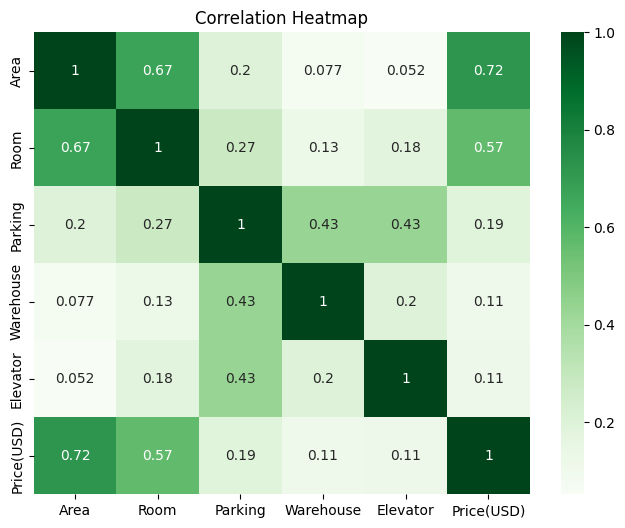

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

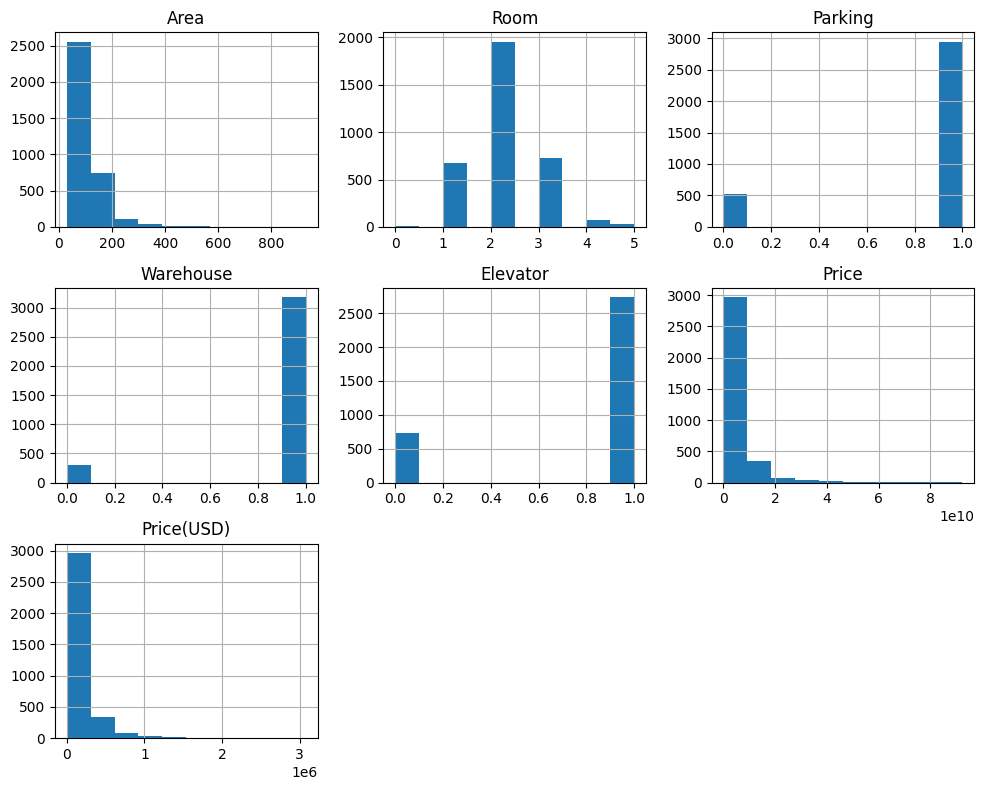

In [ ]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
data = data[['Area', 'Room', 'Parking', 'Price(USD)']]

In [ ]:
data.dropna(inplace=True)

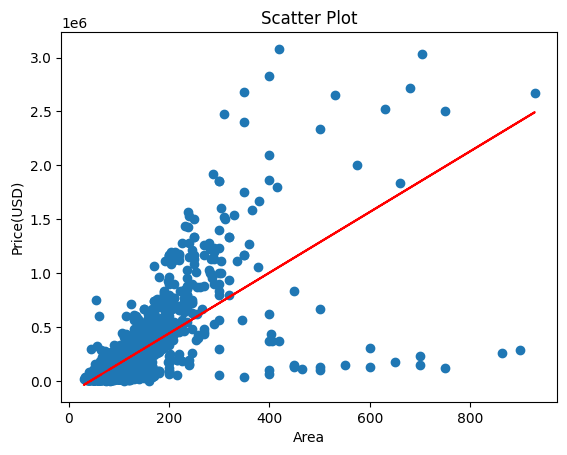

In [ ]:
plt.scatter(data['Area'], data['Price(USD)'])
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.title('Scatter Plot')
x = np.array(data['Area'])
y = np.array(data['Price(USD)'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='red')

plt.show()

## Train your model

In [ ]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(data[['Area']])
poly_model = LinearRegression()
poly_model.fit(x_poly, data['Price(USD)'])

LinearRegression()

In [98]:
x_poly_test = poly_features.transform(data[['Area']])
y_poly_pred = poly_model.predict(x_poly_test)

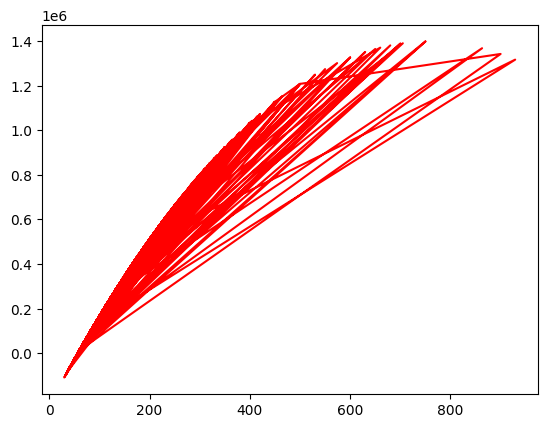

In [99]:
plt.plot(data['Area'], y_poly_pred, color='red')
plt.show()

In [100]:
# Nonlinear Regression using Support Vector Regression (SVR)
x = data['Area'].values.reshape(-1, 1)
y = data['Price(USD)'].values.reshape(-1, 1)

In [101]:
svr_model = SVR(kernel='rbf')
svr_model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [102]:
y_svr_pred = svr_model.predict(x)

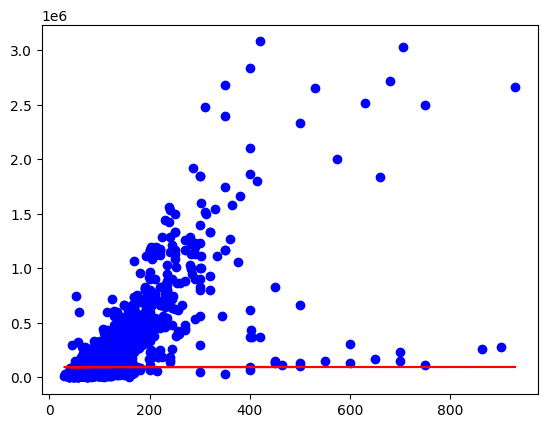

In [103]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_svr_pred, color='red')

In [ ]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

## Train your model

In [ ]:
regr = LinearRegression()
x_train = np.asanyarray(train[['Area', 'Room', 'Parking']])
y_train = np.asanyarray(train[['Price(USD)']])
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', regr.coef_)

Coefficients:  [[ 2420.31297555 52837.19192895 21675.34535051]]


In [ ]:
x_test = np.asanyarray(test[['Area', 'Room', 'Parking']])
y_test = np.asanyarray(test[['Price(USD)']])
y_pred = regr.predict(x_test)

In [108]:
mse = np.mean((y_pred - y_test) ** 2)
variance_score = regr.score(x_test, y_test)

In [109]:
print('Residual sum of squares: %.2f' % mse)
print('Variance score: %.2f' % variance_score)

Residual sum of squares: 35173825859.18
Variance score: 0.51
